In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [41]:
model_df = pd.read_csv(r'C:\Users\jcmar\my_files\SportsBetting\data\ufc_model_results.csv')
model_df = model_df.rename(columns={"event_dates":'event_date'})
odds_df = pd.read_csv(r'C:\Users\jcmar\my_files\SportsBetting\data\odds_df.csv')
print(odds_df.shape, model_df.shape)

(5036, 12) (279, 8)


In [4]:
odds_df.sort_values(by='event_date', ascending=False).to_csv(r'C:\Users\jcmar\my_files\SportsBetting\data\odds_df.csv')

In [5]:
model_df.head()

,Unnamed: 0,red_fighter,blue_fighter,red_probs,blue_probs,winner,correct_pred,event_date
0,5293,Michelle Waterson-Gomez,Gillian Robertson,0.187498,0.812502,0.0,1,2024-06-29
1,5294,Charles Jourdain,Jean Silva,0.156135,0.843865,0.0,1,2024-06-29
2,5295,Payton Talbott,Yanis Ghemmouri,0.727921,0.272079,1.0,1,2024-06-29
3,5296,Andrei Arlovski,Martin Buday,0.205794,0.794206,0.0,1,2024-06-29
4,5297,Ricky Simon,Vinicius Oliveira,0.420951,0.579049,0.0,1,2024-06-29


In [19]:
odds_df.sort_values(by='event_date', ascending=False).head()


,Unnamed: 0,blue_fighter,open_blue,close1_blue,close2_blue,red_fighter,open_red,close1_red,close2_red,event_date
3344,3344,Dustin Poirier,110,-118,100,Max Holloway,-130,-121,-108,2025-07-20
4373,4373,Merab Dvalishvili,-295,-360,-300,Sean O'Malley,225,240,270,2025-06-08
3261,3261,Roman Dolidze,110,122,130,Marvin Vettori,-138,-163,-145,2025-03-16
2767,2767,Rafael Fiziev,-139,-163,-154,Justin Gaethje,112,128,136,2025-03-09
1225,1225,Sam Patterson,260,160,200,Danny Barlow,-345,-245,-200,2025-03-02


In [42]:
df_results = pd.merge(model_df, odds_df, on=['blue_fighter','red_fighter']).reset_index(drop=True) #issue with dates being one day off
df_results = df_results.loc[:, ~df_results.columns.str.contains('^Unnamed')]
df_results['pred_winner'] = np.where(df_results['correct_pred']==1, df_results['winner'], np.abs(1-df_results['winner']))
df_results['Date'] = df_results["event_date_x"].copy()
df_results.sort_values(by='event_date_x', ascending=True)
df_results.shape

(255, 16)

In [2]:
# df_results = pd.read_csv(r'C:\Users\jcmar\my_files\SportsBetting\data\stacked_results.csv')
df_results = pd.read_csv(r'C:\Users\jcmar\my_files\SportsBetting\data\ufc_da2_model_results_test.csv')
df_results['pred_winner'] = np.where(df_results['correct_pred']==1, df_results['winner'], np.abs(1-df_results['winner']))
df_results['Date'] = df_results["event_dates"].copy()
df_results.sort_values(by='Date', ascending=True)


,Unnamed: 0,blue_probs,red_probs,pred_winner,winner,correct_pred,event_dates,open_red,open_blue,red_fighter,blue_fighter,Date
0,0,0.604824,0.395176,0,1,0,2023-07-08,163,-225,robbie lawler,niko price,2023-07-08
1,1,0.655429,0.344571,0,0,1,2023-07-08,150,-200,kamuela kirk,esteban ribovics,2023-07-08
2,2,0.277836,0.722164,1,0,0,2023-07-08,-450,300,yazmin jauregui,denise gomes,2023-07-08
3,3,0.357181,0.642819,1,0,0,2023-07-08,-105,-125,jimmy crute,alonzo menifield,2023-07-08
4,4,0.606716,0.393284,0,0,1,2023-07-08,-385,275,robert whittaker,dricus du plessis,2023-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...
755,755,0.608230,0.391770,0,0,1,2025-06-07,295,-385,kelvin gastelum,joe pyfer,2025-06-07
756,756,0.640543,0.359457,0,0,1,2025-06-07,240,-350,bruno silva,joshua van,2025-06-07
758,758,0.203140,0.796860,1,1,1,2025-06-07,-295,225,merab dvalishvili,sean omalley,2025-06-07
759,759,0.365526,0.634474,1,1,1,2025-06-14,-275,200,michael chiesa,court mcgee,2025-06-14


In [8]:
df_results.tail(20)

,Unnamed: 0,blue_probs,red_probs,pred_winner,winner,correct_pred,event_dates,open_red,open_blue,red_fighter,blue_fighter,Date
741,741,0.544413,0.455587,0,0,1,2025-05-17,114,-135,sodiq yusuff,mairon santos,2025-05-17
742,742,0.721163,0.278838,0,0,1,2025-05-17,300,-430,gilbert burns,michael morales,2025-05-17
743,743,0.443529,0.556471,1,1,1,2025-05-31,-124,100,ketlen vieira,macy chiasson,2025-05-31
744,744,0.417808,0.582192,1,0,0,2025-05-31,-110,-120,jafel filho,allan nascimento,2025-05-31
745,745,0.441582,0.558418,1,0,0,2025-05-31,-305,240,rayanne dos santos,alice ardelean,2025-05-31
746,746,0.401854,0.598146,1,1,1,2025-05-31,-148,118,mateusz gamrot,ludovit klein,2025-05-31
747,747,0.269131,0.730869,1,0,0,2025-05-31,-340,270,billy ray goff,ramiz brahimaj,2025-05-31
748,748,0.574896,0.425104,0,0,1,2025-05-31,132,-165,kurt holobaugh,jordan leavitt,2025-05-31
749,749,0.542554,0.457446,0,1,0,2025-05-31,-137,112,dustin jacoby,bruno lopes,2025-05-31
750,750,0.411050,0.588950,1,0,0,2025-06-07,-142,120,serghei spivac,waldo cortes acosta,2025-06-07


In [3]:
df_results['correct_pred'].sum() / df_results.shape[0]


np.float64(0.7030223390275953)

In [37]:

#stacked results
df_results['prob_winner'] = df_results[['red_probs','blue_probs']].max(axis=1)
df_results['winner_odds'] = np.where(df_results['winner'] == 1, df_results['open_red'], df_results['open_blue'])
df_results['choice_fighter_bet'] = np.where(df_results['pred_winner'] == 1, df_results['open_red'], df_results['open_blue'])
df_results['Date'] = df_results["Date"].astype(str)
# Filter correct predictions
df_correct_pred = df_results[df_results["correct_pred"] == 1].copy() 
df_incorrect_pred = df_results[df_results["correct_pred"] == 0].copy()

pred_correct_odds = df_results[df_results["correct_pred"] == 1]['choice_fighter_bet'].value_counts().sort_index()
pred_incorrect_odds = df_results[df_results["correct_pred"] == 0]['choice_fighter_bet'].value_counts().sort_index()

df_correct_pred.head()

,Unnamed: 0,blue_probs,red_probs,pred_winner,winner,correct_pred,event_dates,open_red,open_blue,red_fighter,blue_fighter,Date,prob_winner,winner_odds,choice_fighter_bet
1,1,0.655429,0.344571,0,0,1,2023-07-08,150,-200,kamuela kirk,esteban ribovics,2023-07-08,0.655429,-200,-200
4,4,0.606716,0.393284,0,0,1,2023-07-08,-385,275,robert whittaker,dricus du plessis,2023-07-08,0.606716,275,275
5,5,0.530360,0.469640,0,0,1,2023-07-08,-186,144,brandon moreno,alexandre pantoja,2023-07-08,0.530360,144,144
8,8,0.377874,0.622126,1,1,1,2023-07-15,-188,140,holly holm,mayra bueno silva,2023-07-15,0.622126,-188,-188
10,10,0.600021,0.399979,0,0,1,2023-07-15,105,-138,austin lingo,melquizael costa,2023-07-15,0.600021,-138,-138


In [7]:
df_incorrect_pred.head()

,Unnamed: 0,blue_probs,red_probs,open_red,open_blue,event_dates,winner,red_fighter,blue_fighter,pred_winner,correct_pred,Date,prob_winner,winner_odds,choice_fighter_bet
0,0,0.604824,0.395176,0.736207,0.540476,2020-01-18,1.0,conor mcgregor,donald cerrone,0.0,0,2020-01-18,0.604824,0.736207,0.540476
4,4,0.606716,0.393284,0.851724,0.383333,2020-01-18,0.0,andre fili,sodiq yusuff,1.0,0,2020-01-18,0.606716,0.383333,0.851724
5,5,0.530360,0.469640,0.882759,0.316667,2020-01-18,1.0,drew dober,nasrat haqparast,0.0,0,2020-01-18,0.530360,0.882759,0.316667
6,6,0.332178,0.667822,0.839655,0.397619,2020-01-18,0.0,anthony pettis,diego ferreira,1.0,0,2020-01-18,0.667822,0.397619,0.839655
7,7,0.490009,0.509991,0.693103,0.585714,2020-01-18,1.0,holly holm,raquel pennington,0.0,0,2020-01-18,0.509991,0.693103,0.585714


C:\Users\jcmar\AppData\Local\Temp\ipykernel_44692\1974871881.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticks(), rotation=90)


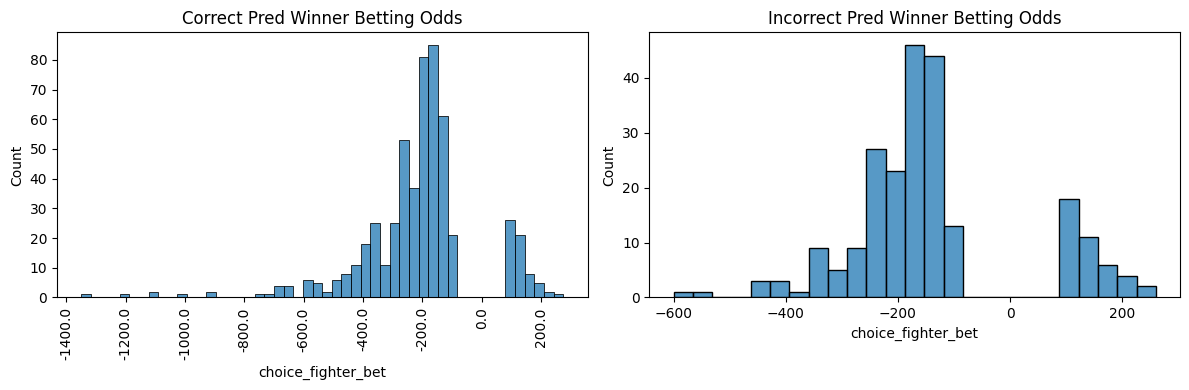

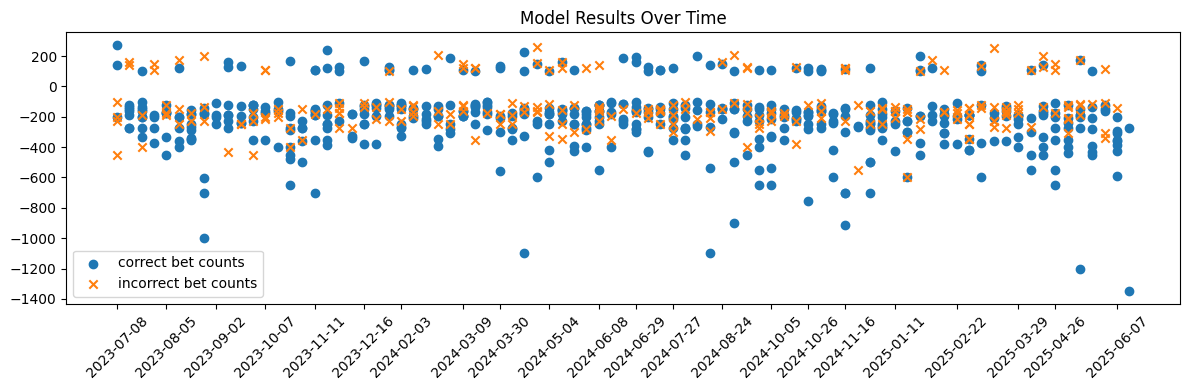

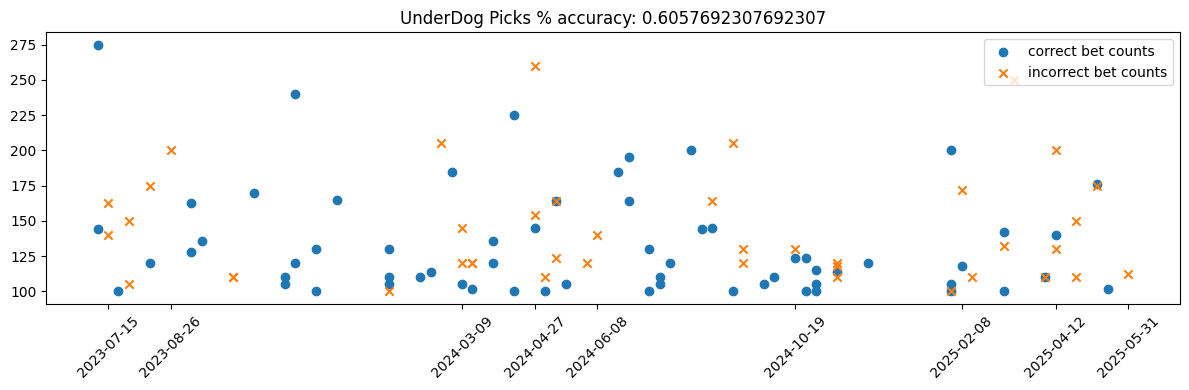

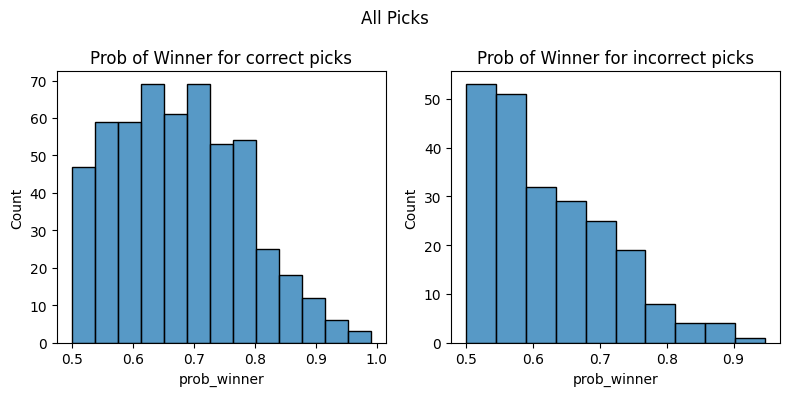

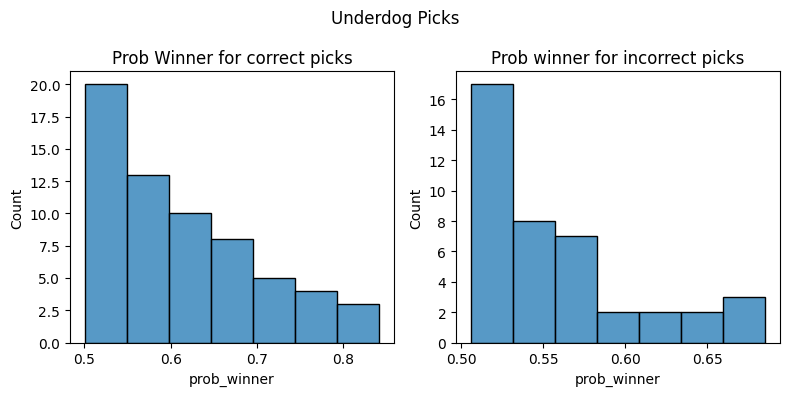

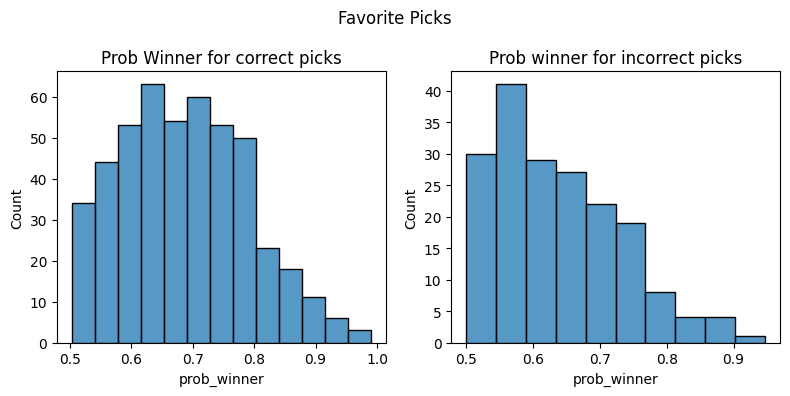

In [38]:


#correct results over time 

# Plot the data
fig, axes = plt.subplots(1,2,figsize=(12, 4))
sns.histplot(df_correct_pred['choice_fighter_bet'], ax=axes[0])
# axes[0].set_xticks(np.linspace(min(pred_correct_odds.index), max(pred_correct_odds.index), num=15))
axes[0].set_xticklabels(axes[0].get_xticks(), rotation=90)
axes[0].set_title("Correct Pred Winner Betting Odds")
sns.histplot(df_incorrect_pred['choice_fighter_bet'], ax=axes[1])
axes[1].set_title("Incorrect Pred Winner Betting Odds")
plt.tight_layout()
plt.show()

# plt.figure(figsize=(12,4))
# plt.scatter(pred_correct_odds.index, pred_correct_odds.values, marker='o', label='correct bet counts')
# plt.scatter(pred_incorrect_odds.index, pred_incorrect_odds.values, marker='x', label='incorrect bet counts')
# plt.xlabel("Book maker odds")
# plt.xticks(np.linspace(min(pred_correct_odds.index), max(pred_correct_odds.index), num=15))
# plt.title("Test Data Results")
# plt.legend()
# plt.tight_layout()
# plt.show()

#Model Results Over time 
plt.figure(figsize=(12,4))
plt.scatter(df_correct_pred["Date"], df_correct_pred['choice_fighter_bet'], marker='o', label='correct bet counts')
plt.scatter(df_incorrect_pred["Date"], df_incorrect_pred['choice_fighter_bet'], marker='x', label='incorrect bet counts')
plt.xticks(df_correct_pred["Date"][::25], rotation=45)
plt.legend()
plt.title("Model Results Over Time")
plt.tight_layout()
plt.show()

#underdog stats
df_correct_underdog = df_correct_pred.loc[df_correct_pred['choice_fighter_bet'] > 0, ['choice_fighter_bet','Date','prob_winner','winner','winner_odds','correct_pred']]
df_incorrect_underdog = df_incorrect_pred.loc[df_incorrect_pred['choice_fighter_bet'] > 0,  ['choice_fighter_bet','Date','prob_winner','winner','winner_odds','correct_pred']]

df_correct_underdog["Date"] = pd.to_datetime(df_correct_underdog["Date"])
df_incorrect_underdog["Date"] = pd.to_datetime(df_incorrect_underdog["Date"])
plt.figure(figsize=(12,4))
plt.scatter(df_correct_underdog["Date"], df_correct_underdog['choice_fighter_bet'], marker='o', label='correct bet counts')
plt.scatter(df_incorrect_underdog['Date'], df_incorrect_underdog['choice_fighter_bet'], marker='x', label='incorrect bet counts')
plt.xticks(df_incorrect_underdog["Date"][::5], rotation=45)
plt.legend()
plt.title(f"UnderDog Picks % accuracy: {len(df_correct_underdog)/ (len(df_correct_underdog)+len(df_incorrect_underdog))}")
plt.tight_layout()
plt.show()

#Probability Plots 
#all fighters
fig, axes = plt.subplots(1,2, figsize=(8,4))
sns.histplot(df_correct_pred['prob_winner'], ax=axes[0])
axes[0].set_title('Prob of Winner for correct picks')
sns.histplot(df_incorrect_pred['prob_winner'], ax=axes[1])
axes[1].set_title('Prob of Winner for incorrect picks')
fig.suptitle('All Picks')
plt.tight_layout()
plt.show()

#underdogs
fig, axes = plt.subplots(1,2, figsize=(8,4))
sns.histplot(df_correct_underdog['prob_winner'], ax=axes[0])
axes[0].set_title('Prob Winner for correct picks')
sns.histplot(df_incorrect_underdog['prob_winner'], ax=axes[1])
axes[1].set_title('Prob winner for incorrect picks')
fig.suptitle('Underdog Picks')
plt.tight_layout()
plt.show()

#favorites
correct_fav = df_correct_pred.loc[df_correct_pred['choice_fighter_bet'] < 0, ['choice_fighter_bet','Date','prob_winner','winner','winner_odds','correct_pred']]
incorrect_fav = df_incorrect_pred.loc[df_incorrect_pred['choice_fighter_bet'] < 0, ['choice_fighter_bet','Date','prob_winner','winner','winner_odds','correct_pred']]
fig, axes = plt.subplots(1,2, figsize=(8,4))
sns.histplot(correct_fav['prob_winner'], ax=axes[0])
axes[0].set_title('Prob Winner for correct picks')
sns.histplot(incorrect_fav['prob_winner'], ax=axes[1])
axes[1].set_title('Prob winner for incorrect picks')
fig.suptitle('Favorite Picks')
plt.tight_layout()
plt.show()

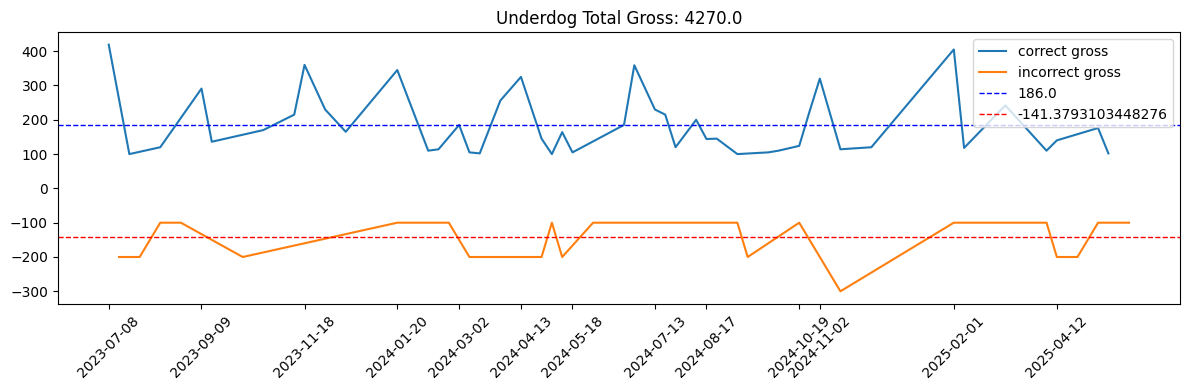

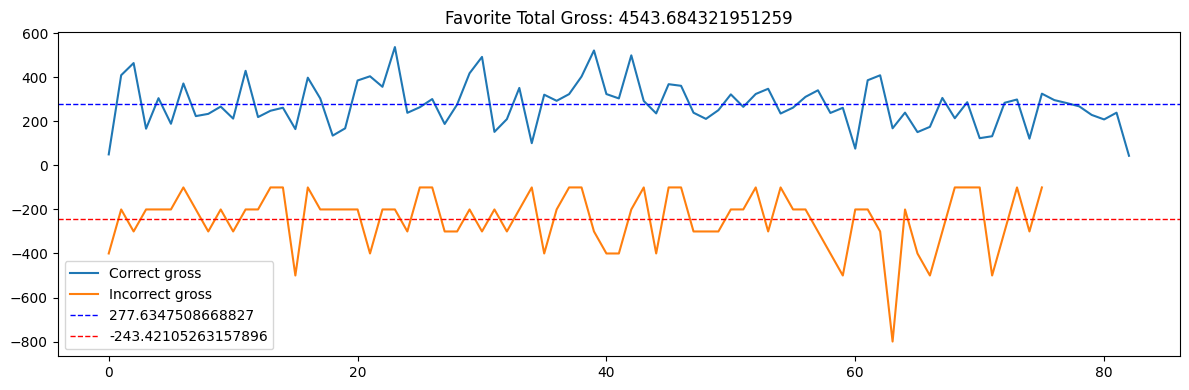

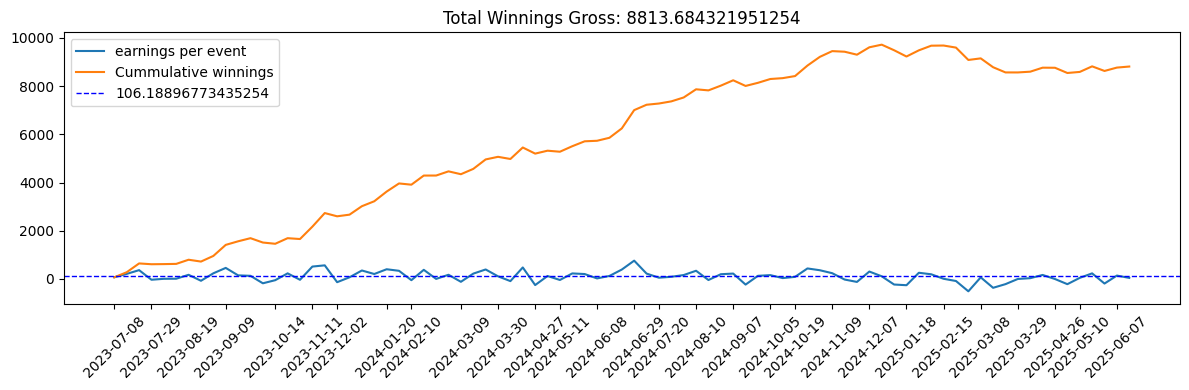

dog per bet: 41.05769230769231, fav per bet: 6.91580566507041


In [39]:
def expected_winnings(wager, odds, prob_w):
    ev = 0
    if odds > 0:
        ev = prob_w * ((odds/100) * wager) + (1-prob_w) * wager
    else: 
        ev = prob_w * ((100/odds) * wager) + (1-prob_w) * wager
    return ev

def winnings(wager, odds, win):
    gross = 0
    if win: 
        if odds > 0:
            gross = (odds/100) * wager
        else:
            gross = (100/-odds) * wager
    else:
        gross = -wager
    return gross 

def gross_winnings(df, wager):
    total_winnings = []
    for _,row in df.iterrows():
        line = row['winner_odds']
        win = None
        if row['correct_pred'] == 1:
            win = True
        else:
            win = False
        gross = winnings(wager, line, win)
        total_winnings.append(gross)
    return total_winnings

wager = 100
df_correct_underdog['correct_underdog_winnings'] = gross_winnings(df_correct_underdog, wager)
df_incorrect_underdog['incorrect_underdog_loss'] = gross_winnings(df_incorrect_underdog, wager)
underdog_bet_gross = df_correct_underdog['correct_underdog_winnings'].sum() + df_incorrect_underdog['incorrect_underdog_loss'].sum()

correct_fav['correct_fav_winnings'] = gross_winnings(correct_fav, wager)
incorrect_fav['incorrect_fav_loss'] = gross_winnings(incorrect_fav, wager)
total_fav_gross = correct_fav['correct_fav_winnings'].sum() + incorrect_fav['incorrect_fav_loss'].sum()

df_results['total_winnings'] = gross_winnings(df_results, wager)
total_gross = sum(df_results['total_winnings'])

group_correct_dog = df_correct_underdog.groupby('Date')['correct_underdog_winnings'].sum()
group_incorrect_dog = df_incorrect_underdog.groupby('Date')['incorrect_underdog_loss'].sum()
plt.figure(figsize=(12,4))
plt.plot(group_correct_dog.index, group_correct_dog.values, label='correct gross')
plt.plot(group_incorrect_dog.index, group_incorrect_dog.values, label='incorrect gross')
plt.xticks(df_correct_underdog["Date"][::5], rotation=45)
plt.axhline(y=np.mean(group_correct_dog.values), color="blue", linestyle="--", linewidth=1, label=np.mean(group_correct_dog.values))
plt.axhline(y=np.mean(group_incorrect_dog.values), color="red", linestyle="--", linewidth=1, label=np.mean(group_incorrect_dog.values))
plt.title(f"Underdog Total Gross: {underdog_bet_gross}")
plt.legend()
plt.tight_layout()
plt.show()

group_correct_fav = correct_fav.groupby('Date')['correct_fav_winnings'].sum()
group_incorrect_fav = incorrect_fav.groupby('Date')['incorrect_fav_loss'].sum()
plt.figure(figsize=(12,4))
plt.plot(group_correct_fav.values, label="Correct gross")
plt.plot(group_incorrect_fav.values, label="Incorrect gross")
# plt.xticks(correct_fav["Date"][::15], rotation=45)
plt.axhline(y=np.mean(group_correct_fav.values), color="blue", linestyle="--", linewidth=1, label=np.mean(group_correct_fav.values))
plt.axhline(y=np.mean(group_incorrect_fav.values), color="red", linestyle="--", linewidth=1, label=np.mean(group_incorrect_fav.values))
plt.title(f'Favorite Total Gross: {total_fav_gross}')
plt.legend()
plt.tight_layout()
plt.show()

group_correct = df_results.groupby('Date')['total_winnings'].sum()
cum_winnings = np.cumsum(group_correct.values)
plt.figure(figsize=(12,4))
plt.plot(group_correct.index,group_correct.values, label='earnings per event')
plt.plot(group_correct.index, cum_winnings, label = 'Cummulative winnings')
plt.title(f'Total Winnings Gross: {total_gross}')
plt.xticks(df_results["Date"][::27], rotation=45)
plt.axhline(y=np.mean(group_correct.values), color="blue", linestyle="--", linewidth=1, label=np.mean(group_correct.values))
plt.legend()
plt.tight_layout()
plt.show()

dog_per_bet_gross = underdog_bet_gross / (len(df_correct_underdog)+len(df_incorrect_underdog))
fav_per_bet_gross = total_fav_gross / (len(correct_fav)+len(incorrect_fav))
print(f'dog per bet: {dog_per_bet_gross}, fav per bet: {fav_per_bet_gross}')


In [39]:
df_results.shape

(634, 16)

In [38]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          634 non-null    int64  
 1   red_fighter         634 non-null    object 
 2   blue_fighter        634 non-null    object 
 3   red_probs           634 non-null    float64
 4   blue_probs          634 non-null    float64
 5   winner              634 non-null    float64
 6   correct_pred        634 non-null    int64  
 7   event_dates         634 non-null    object 
 8   open_red            634 non-null    int64  
 9   open_blue           634 non-null    int64  
 10  pred_winner         634 non-null    float64
 11  Date                634 non-null    object 
 12  prob_winner         634 non-null    float64
 13  winner_odds         634 non-null    int64  
 14  choice_fighter_bet  634 non-null    int64  
 15  total_winnings      634 non-null    float64
dtypes: float

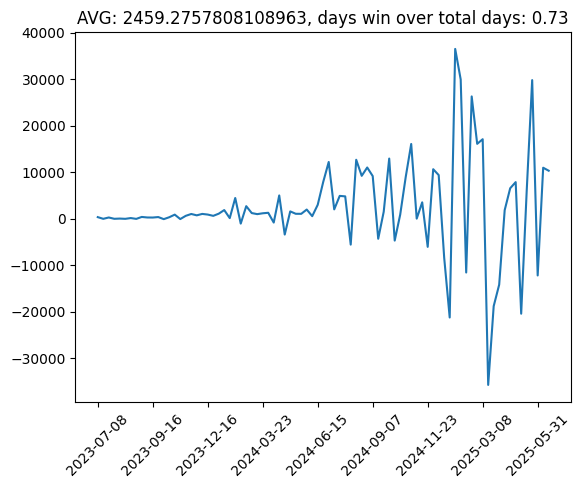

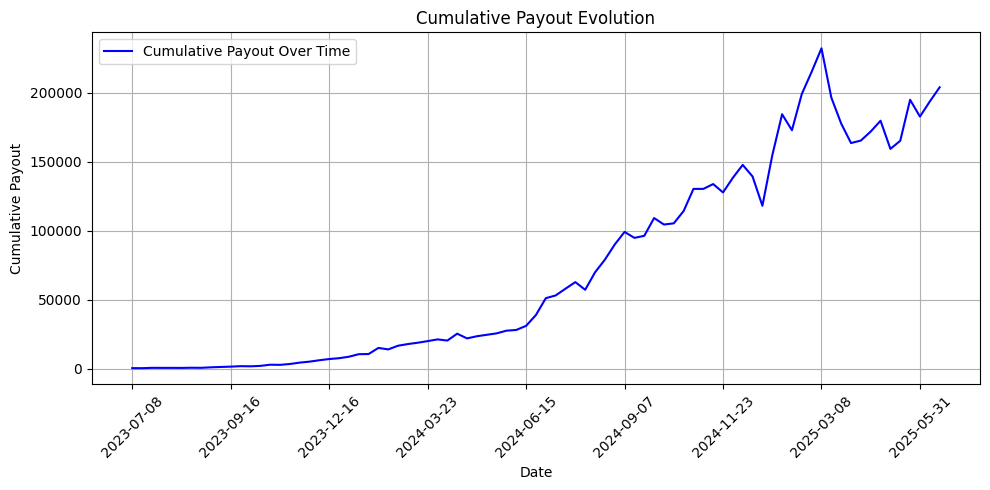

Num events to reach 10,000: 24
Num events to reach 100,000: 54


In [40]:
from collections import defaultdict

def kelly_criterion(row):
    p = row['prob_winner']
    
    if row['pred_winner'] == 1:
        line = row['open_red']
    else:
        line = row['open_blue']

    # Prevent division by zero or invalid odds
    if line == 0 or pd.isna(line):
        return 0.0

    odds = line / 100 if line > 0 else 100 / -line
    f_star = p - ((1 - p) / odds)

    return f_star

# Apply Kelly criterion
df_results['f_star'] = df_results.apply(kelly_criterion, axis=1)

# Count how many positive bets (f_star > 0) exist per Date
group_counts = (
    df_results[df_results['f_star'] > 0]
    .groupby('Date')
    .size()
    .to_dict()
)

# Map those counts to all rows in df_results
df_results['group_size'] = df_results['Date'].map(group_counts).fillna(0).astype(int)

# Avoid division by zero in group_size
df_results['group_size'] = df_results['group_size'].replace(0, 1)

# Normalize f_star by number of positive bets on that date
df_results['f_star'] = df_results['f_star'] / df_results['group_size']

# bankroll = 700
# bankroll_history = []  
# wagers = []
# single_payout = []
# date_payout = defaultdict(list)

# def simulate_betting(df, bankroll):
#     # bankroll = 700

#     bankroll_history = []  
#     wagers = []
#     single_payout = []
#     # date_payout = defaultdict(list)

#     event_total = 0 
#     date = df['Date'].iloc[0]
#     for index, row in df.iterrows():
        
#         bet_fraction = row['f_star'] 
#         if bet_fraction < 0:
#             payout = 0
#             single_payout.append(payout)
#             wagers.append(payout)
#             continue  

#         bet_size = bankroll * bet_fraction  
#         wagers.append(bet_size)
#         odds=0
#         if row['pred_winner'] == row['winner']:  
#             if row['pred_winner'] == 1:
#                 odds = row['open_red']
#             else:
#                 odds = row['open_blue']

#             if odds > 0:
#                 payout = bet_size * (odds / 100)
#                 single_payout.append(payout)
#             else:
#                 payout = bet_size * (100 / -odds)
#                 single_payout.append(payout)

#             event_total += payout  
#         else:
#             payout = 0
#             event_total -= bet_size 
#             single_payout.append(payout) 

#     bankroll_history.append(bankroll + event_total)
#     bankroll = bankroll_history[-1]  

def simulate_betting(group, bankroll):
    wagers = []
    single_payout = []
    event_total = 0  

    for _, row in group.iterrows():
        bet_fraction = row['f_star']
        if bet_fraction <= 0:
            wager = 0
            payout = 0
        else:
            wager = bankroll * bet_fraction
            odds = row['open_red'] if row['pred_winner'] == 1 else row['open_blue']
            if row['pred_winner'] == row['winner']:
                payout = wager * (odds / 100) if odds > 0 else wager * (100 / -odds)
            else:
                payout = -wager

        wagers.append(wager)
        single_payout.append(payout)
        event_total += payout

    group = group.copy()
    group['wager'] = wagers
    group['single_payout'] = single_payout
    group['event_payout'] = event_total
    new_bankroll = bankroll + event_total
    group['bankroll'] = bankroll

    return group, new_bankroll


# Simulation driver
result_frames = []
bankroll_frames = []

bankroll = 1000  # Initial bankroll

for date, group in df_results.sort_values('Date').groupby('Date'):
    bankroll_frames.extend([bankroll] * len(group))  # Match group size
    updated_group, new_bankroll = simulate_betting(group, bankroll)
    bankroll = new_bankroll
    result_frames.append(updated_group)

# Combine results
df_results = pd.concat(result_frames).reset_index(drop=True)
df_results['bankroll'] = bankroll_frames

daily_payouts = df_results.groupby('Date')['event_payout'].first().sort_index()
cumulative_payouts = daily_payouts.cumsum()
dates = cumulative_payouts.index

# Ensure Date is sorted
daily_payouts = daily_payouts.sort_index()
proportion_wins = sum(np.where(daily_payouts > 0, 1, 0)) / daily_payouts.shape[0]
plt.plot(daily_payouts)
plt.xticks(ticks=dates[::10], rotation=45)
plt.title(f"AVG: {np.mean(daily_payouts)}, days win over total days: {round(proportion_wins,2)}")
plt.show()

# Plot cumulative payout
plt.figure(figsize=(10, 5))
plt.plot(daily_payouts.index, daily_payouts.cumsum(), label="Cumulative Payout Over Time", color="blue")
plt.xlabel("Date")
plt.ylabel("Cumulative Payout")
plt.title("Cumulative Payout Evolution")
plt.xticks(rotation=45)
plt.xticks(ticks=dates[::10], rotation=45)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

for i, payout in enumerate(cumulative_payouts):
    if payout > 10000:
        print(f"Num events to reach 10,000: {i +1}")
        break
for i, payout in enumerate(cumulative_payouts):
    if payout > 100000:
        print(f"Num events to reach 100,000: {i +1}")
        break
for i, payout in enumerate(cumulative_payouts):
    if payout > 1000000:
        print(f"Num events to reach 1,000,000: {i +1}")
        break

In [86]:
len(cumulative_payouts)

112

In [85]:
df_results["Date"]

0      2022-04-23
1      2022-04-23
2      2022-04-30
3      2022-04-30
4      2022-04-30
          ...    
629    2025-02-15
630    2025-02-15
631    2025-02-15
632    2025-02-15
633    2025-03-01
Name: Date, Length: 634, dtype: object

In [61]:
br = 100
for i in range(len(np.unique(df_results['Date']))):
    test = br * .37
    br += test

print(br)

2.054487586402821e+17


In [54]:

df_results[['Date','red_fighter','blue_fighter','pred_winner','correct_pred','red_probs', 'blue_probs','open_red','open_blue','f_star','group_size','wager','single_payout','event_payout','bankroll']].tail(30)

,Date,red_fighter,blue_fighter,pred_winner,correct_pred,red_probs,blue_probs,open_red,open_blue,f_star,group_size,wager,single_payout,event_payout,bankroll
731,2025-05-10,brad katona,bekzat almakhan,0,1,0.487474,0.512526,140,-188,-0.100981,4,0.000000,0.000000,5866.328950,160433.759465
732,2025-05-10,mike malott,charles radtke,1,1,0.603118,0.396882,-200,150,-0.047661,4,0.000000,0.000000,5866.328950,160433.759465
733,2025-05-10,modestas bukauskas,ion cutelaba,0,0,0.366003,0.633997,-110,-120,0.048698,4,7812.882312,-7812.882312,5866.328950,160433.759465
734,2025-05-10,navajo stirling,ivan erslan,0,0,0.485482,0.514518,-250,175,0.059275,4,9509.716020,-9509.716020,5866.328950,160433.759465
735,2025-05-17,gilbert burns,michael morales,0,1,0.278838,0.721163,300,-430,-0.238919,2,0.000000,0.000000,29784.690991,166300.088415
736,2025-05-17,sodiq yusuff,mairon santos,0,1,0.455587,0.544413,114,-135,-0.035315,2,0.000000,0.000000,29784.690991,166300.088415
737,2025-05-17,julian erosa,melquizael costa,0,1,0.360736,0.639264,170,-205,-0.050123,2,0.000000,0.000000,29784.690991,166300.088415
738,2025-05-17,dustin stoltzfus,nursulton ruziboev,0,1,0.419376,0.580624,225,-278,-0.292620,2,0.000000,0.000000,29784.690991,166300.088415
739,2025-05-17,tecia pennington,luana pinheiro,1,1,0.692743,0.307257,-395,310,-0.260461,2,0.000000,0.000000,29784.690991,166300.088415
740,2025-05-17,luana santos,tainara lisboa,0,0,0.435730,0.564271,-105,-115,0.031591,2,5253.550754,-5253.550754,29784.690991,166300.088415


In [33]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          634 non-null    int64  
 1   red_fighter         634 non-null    object 
 2   blue_fighter        634 non-null    object 
 3   red_probs           634 non-null    float64
 4   blue_probs          634 non-null    float64
 5   winner              634 non-null    float64
 6   correct_pred        634 non-null    int64  
 7   event_dates         634 non-null    object 
 8   open_red            634 non-null    int64  
 9   open_blue           634 non-null    int64  
 10  pred_winner         634 non-null    float64
 11  Date                634 non-null    object 
 12  prob_winner         634 non-null    float64
 13  winner_odds         634 non-null    int64  
 14  choice_fighter_bet  634 non-null    int64  
 15  total_winnings      634 non-null    float64
 16  f_star  

In [77]:
df_results[['Date','winner','correct_pred','red_fighter','blue_fighter','red_probs','blue_probs','open_red','open_blue','f_star','wager','single_payout','event_payout']].head()

,Date,winner,correct_pred,red_fighter,blue_fighter,red_probs,blue_probs,open_red,open_blue,f_star,wager,single_payout,event_payout
0,2022-04-23,0.0,1,Clay Guida,Claudio Puelles,0.359909,0.640090,150,-175,0.010249,1.024879,0.585645,0.585645
1,2022-04-23,0.0,1,Amanda Lemos,Jessica Andrade,0.411621,0.588379,170,-200,-0.234862,0.000000,0.000000,0.585645
2,2022-04-30,0.0,1,Andre Fili,Joanderson Brito,0.284097,0.715903,-255,215,0.116753,11.675302,25.101899,46.876573
3,2022-04-30,0.0,0,Rob Font,Marlon Vera,0.913477,0.086523,-175,150,0.152412,15.241222,-15.241222,46.876573
4,2022-04-30,1.0,1,Darren Elkins,Tristan Connelly,0.920467,0.079533,-150,130,0.160233,16.023345,10.682230,46.876573


In [ ]:
df_results['wager'] = wagers
df_results['single_payout'] = single_payout
df_results['event_payout'] 

In [58]:
betting_results = df_results[['Date','winner','correct_pred','red_fighter','blue_fighter','red_probs','blue_probs','open_red','open_blue','f_star','wager','single_payout','event_payout']]
betting_results.to_csv(r'C:\Users\jcmar\my_files\SportsBetting\data\betting_results.csv')

In [26]:
betting_results.head(30)

,Date,winner,correct_pred,red_fighter,blue_fighter,red_probs,blue_probs,open_red,open_blue,f_star,wager,single_payout,event_payout
0,2024-06-29,0.0,1,Michelle Waterson-Gomez,Gillian Robertson,0.187498,0.812502,225,-278,0.291259,291.259387,104.769564,1858.161021
1,2024-06-29,0.0,1,Charles Jourdain,Jean Silva,0.156135,0.843865,-198,164,0.748661,748.661083,1227.804176,1858.161021
2,2024-06-29,1.0,1,Payton Talbott,Yanis Ghemmouri,0.727921,0.272079,-298,240,-0.082874,0.000000,0.000000,1858.161021
3,2024-06-29,0.0,1,Andrei Arlovski,Martin Buday,0.205794,0.794206,225,-278,0.222100,222.099843,79.892030,1858.161021
4,2024-06-29,0.0,1,Ricky Simon,Vinicius Oliveira,0.420951,0.579049,-175,145,0.288738,288.737507,418.669385,1858.161021
5,2024-06-29,0.0,1,Cub Swanson,Andre Fili,0.375729,0.624271,130,-155,0.041890,41.890094,27.025867,1858.161021
6,2024-07-13,1.0,1,Gabriel Bonfim,Ange Loosa,0.618834,0.381166,-430,300,-1.020178,0.000000,0.000000,-2048.788833
7,2024-07-13,1.0,0,Rose Namajunas,Tracy Cortez,0.306840,0.693160,-200,163,0.504914,1443.125144,-1443.125144,-2048.788833
8,2024-07-13,0.0,1,Santiago Ponzinibbio,Muslim Salikhov,0.434254,0.565746,-148,124,0.215541,616.051139,763.903412,-2048.788833
9,2024-07-13,1.0,0,Evan Elder,Darrius Flowers,0.364816,0.635184,-425,330,0.524633,1499.485950,-1499.485950,-2048.788833
